<a href="https://colab.research.google.com/github/Guliko24/NetZoo_network/blob/main/GRN_16_MCF7_vs_MDA-MB231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the packages as needed
import pandas as pd
import networkx as nx

In [2]:
# prompt: let's load Gdrive onto notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Navigate to your Google Drive files
%cd /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


In [4]:
#let's read the MCF7_TF_Genes dataset and make changes
df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)
df_MDA_MB231_TF_Genes=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000768.csv', index_col=0)
df_gene_expression=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/CCLE_expression_withinSample.csv', index_col=0)
#

In [ ]:
#let's do initial data assessment
df_MCF7_TF_Genes.head()


A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Row                                                                          
AHR  -1.443279 -1.967447 -2.760445 -2.073087  1.251514  0.385485 -1.715180   
AHRR -1.247997 -2.028449 -2.831273 -1.976606  1.202019  0.408661 -1.723908   
AIRE -1.380017  2.783954  1.011333  3.807602 -3.535072 -1.611140  1.657074   
ALX1 -2.001329  3.642444 -0.656243  0.632257  0.204571 -0.584100  1.287642   
ALX3 -1.201413  0.550952 -0.211441  0.657875 -0.089130 -0.913549  0.404178   

          AAAS      AACS     AADAC  ...    TMEM88   TMEM88B    TMEM89  \
Row                                 ...                                 
AHR   2.865040  0.034788 -1.152120  ... -0.878857  0.459640  1.375959   
AHRR  2.810044  0.225790 -1.189913  ... -0.761727  0.619967  1.403784   
AIRE -1.797554 -1.676323 -1.153214  ... -1.082261 -1.291455 -1.956019   
ALX1  0.738631 -1.492440  2.054034  ... -1.472459 -1.322024 -0.123587   
ALX3  0.546880 -1.522372  0.821050  ... -2.399966 -1.392676  0.684690   

        TMEM8B     TMEM9    TMEM91    TMEM92    TMEM94    TMEM95    TMEM97  
Row                                                                         
AHR  -1.016009 -0.242322  1.891062 -0.818321 -0.052743 -0.473725 -0.298555  
AHRR -0.775855 -0.152985  1.974241 -0.680559  0.012663 -0.332161 -0.117967  
AIRE -0.419732 -0.210442 -1.207542 -0.703877 -1.442472 -0.474597 -0.882657  
ALX1 -2.152722 -2.204323 -0.050309 -2.532883 -0.852312 -2.007539 -1.760582  
ALX3 -2.412815 -2.458452  0.413145 -2.533361 -1.395355 -2.138298 -2.579043  

[5 rows x 16383 columns]

In [ ]:
df_MDA_MB231_TF_Genes.head()

A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Row                                                                          
AHR  -1.448563 -2.284170 -2.048069 -2.264498  1.296231 -0.053591 -1.633524   
AHRR -1.264257 -2.349954 -2.185647 -2.152969  1.237040  0.002559 -1.662965   
AIRE -1.123451  2.413452 -0.467839  3.015499  0.412546 -0.659312  1.721401   
ALX1 -1.858799  3.373790  0.293488  0.260516  0.337506 -1.088905  1.258831   
ALX3 -0.962345  0.063265  0.269995  0.049707  0.752652 -1.132987  0.480215   

          AAAS      AACS     AADAC  ...    ZWILCH     ZWINT      ZXDA  \
Row                                 ...                                 
AHR  -1.166887 -1.177184 -2.545726  ... -0.395061 -2.423942 -1.526902   
AHRR -0.980370 -0.921086 -2.435069  ... -0.503005 -2.400454 -1.657514   
AIRE -0.960508 -1.848828 -1.694674  ...  1.262312 -0.303865  1.914416   
ALX1 -2.183060 -2.379275 -0.286095  ...  2.542970 -0.155270  0.804753   
ALX3 -2.977034 -2.616413 -1.650841  ...  1.254237 -1.329236  1.656838   

          ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX     ZZEF1      ZZZ3  
Row                                                                         
AHR  -2.267134  0.070638 -2.928558 -0.280536 -1.684660  0.329325  0.796722  
AHRR -2.273704  0.344541 -2.838389 -0.188903 -1.445998  0.619095  1.050448  
AIRE -0.356376 -2.208080  0.280535 -0.582978 -1.890069 -1.811252 -1.039348  
ALX1 -0.544151 -1.888662 -0.163275 -0.685296 -2.875321 -2.705523 -0.346683  
ALX3  0.443442 -1.843481 -1.387364 -0.975086 -3.358992 -2.483430 -0.183521  

[5 rows x 18560 columns]

In [ ]:
df_gene_expression.head()
#df_gene_expression.info()

Unnamed: 0  ACH-001113  ACH-001289  ACH-001339  ACH-001538  ACH-000242  \
0     TSPAN6   11.676455   11.830119   10.843368   12.652100   14.215396   
1       TNMD    7.801777    8.192801    7.801777    7.801777    7.801777   
2       DPM1   12.579853   12.379945   12.929608   12.744038   12.058332   
3      SCYL3   10.607789   10.110254   10.204371   10.582597   10.357270   
4   C1orf112   11.125686   10.520779   11.410654   10.098584   10.676832   

   ACH-000708  ACH-000327  ACH-000233  ACH-000461  ...  ACH-000114  \
0   11.836555   11.584980    8.070704   11.658064  ...   10.948431   
1    8.012218    7.801777    7.801777    7.801777  ...    7.909863   
2   12.615618   12.149958   11.622506   12.156075  ...   12.211414   
3   10.495712   10.257913   11.515329   10.137407  ...   10.781342   
4   10.973002   10.365802   10.727954   10.344537  ...    9.975929   

   ACH-000402  ACH-000036  ACH-000973  ACH-001128  ACH-000750  ACH-000285  \
0    8.015361   11.606687   11.602840   13.263376   11.095242    8.034773   
1    7.801777    7.801777    7.801777    7.801777    7.801777    7.801777   
2   11.596349   12.281268   12.319981   11.593337   12.037646   11.728730   
3   10.637852   10.209548    9.658023   10.086136    9.794809   10.857631   
4   12.196147    9.675298   10.404968   10.611419   10.293415   11.565352   

   ACH-001858  ACH-001997  ACH-000052  
0   11.946623   12.725968   11.423627  
1    7.801777    7.801777    7.801777  
2   12.577235   13.369510   11.483125  
3    9.969378   10.575398   10.071066  
4   10.247764   11.034427   10.674963  

[5 rows x 1377 columns]

In [5]:
#let's filter out two cell lines MCF=ACH-000019 and MDA=ACH-000768
import pandas as pd

# Load the gene expression file
# Replace 'gene_expression.csv' with the path to your file

data=pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/CCLE_expression_withinSample.csv', index_col=0)
# Specify the two cell lines to keep
cell_lines_to_keep = ['ACH-000019', 'ACH-000768']

# Filter columns to keep only the specified cell lines
filtered_gene_expression = data[cell_lines_to_keep]

# Save the filtered data to a new file (optional)
filtered_gene_expression.to_csv('MCF7_MDA_gene_expression.csv', index=True)




In [6]:
filtered_gene_expression.head()

ACH-000019  ACH-000768
TSPAN6     10.202802   11.031839
TNMD        7.801777    7.801777
DPM1       12.930274   11.814957
SCYL3      10.525537   10.149789
C1orf112   10.247321   11.429073

In [7]:
filtered_gene_expression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19177 entries, TSPAN6 to AC113348.1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ACH-000019  19177 non-null  float64
 1   ACH-000768  19177 non-null  float64
dtypes: float64(2)
memory usage: 965.5+ KB


In [8]:
# Find the highest gene expression values in the filtered data
# Sort by the highest value in either of the two columns
highest_entries = filtered_gene_expression.max(axis=1).sort_values(ascending=False)

# Display the top entries
top_genes = filtered_gene_expression.loc[highest_entries.index[:10]]  # Top 10 genes

print(top_genes)


         ACH-000019  ACH-000768
MT.CO1    19.806354   19.774521
EEF1A1    19.472050   19.797459
KRT8      19.457424   15.800255
MT.ND4    18.786785   19.013745
MT.CO2    18.915156   18.823713
MT.CO3    18.309643   18.409090
KRT18     18.277143   15.018627
MT.ATP6   17.836363   18.248924
ACTB      17.447424   18.225267
GAPDH     17.532968   18.101849


In [9]:
import pandas as pd
from scipy.stats import ttest_rel



# Perform a paired t-test for each gene
# Calculate p-values for each gene
p_values = filtered_gene_expression.apply(
    lambda row: ttest_rel([row[0]], [row[1]]).pvalue, axis=1
)

# Add p-values to the DataFrame
filtered_gene_expression['p_value'] = p_values

# Filter for significant genes (p-value < 0.05)
significant_genes = filtered_gene_expression[filtered_gene_expression['p_value'] < 0.05]

# Save the significant genes to a new file
significant_genes.to_csv('significant_genes.csv')

# Display the top significant genes
print(significant_genes)


<ipython-input-9-cfb283bf0bce>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda row: ttest_rel([row[0]], [row[1]]).pvalue, axis=1
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Empty DataFrame
Columns: [ACH-000019, ACH-000768, p_value]
Index: []


<ipython-input-9-cfb283bf0bce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gene_expression['p_value'] = p_values


In [10]:
significant_genes.head()

##looks like there are no significantly different genes expressed between two cell lines


Empty DataFrame
Columns: [ACH-000019, ACH-000768, p_value]
Index: []

In [11]:
import numpy as np
import pandas as pd

def normalize_matrix(matrix: pd.DataFrame) -> pd.DataFrame:
    """
    Normalize the values in the matrix to a range of [0, 1].
    """
    normalized_matrix = (matrix - matrix.min().min()) / (matrix.max().max() - matrix.min().min())
    return normalized_matrix

def filter_by_threshold(matrix: pd.DataFrame, threshold: float, mode: str = 'greater') -> pd.DataFrame:
    """
    Filter the matrix based on a threshold.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        threshold: The threshold value for filtering.
        mode: 'greater' to keep values greater than threshold, 'less' to keep values less than threshold.
    """
    if mode == 'greater':
        return matrix[matrix > threshold].fillna(0)
    elif mode == 'less':
        return matrix[matrix < threshold].fillna(0)
    else:
        raise ValueError("Mode must be either 'greater' or 'less'")

def binarize_matrix(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Binarize the matrix based on a threshold.
    Values greater than or equal to the threshold become 1, otherwise 0.
    """
    binary_matrix = (matrix >= threshold).astype(int)
    return binary_matrix

def rank_interactions(matrix: pd.DataFrame, top_n: int = 5) -> pd.DataFrame:
    """
    Rank the top N interactions for each transcription factor.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        top_n: Number of top interactions to return for each TF.
    """
    ranked_interactions = pd.DataFrame()
    for tf in matrix.index:
        top_genes = matrix.loc[tf].nlargest(top_n)
        ranked_interactions = pd.concat([ranked_interactions, top_genes], axis=1)
    return ranked_interactions.T

def aggregate_interactions(matrix: pd.DataFrame, axis: int = 0) -> pd.Series:
    """
    Aggregate interaction strengths.
    Parameters:
        axis: 0 to aggregate across genes (per TF), 1 to aggregate across TFs (per Gene).
    """
    return matrix.sum(axis=axis)

def construct_interaction_network(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Construct an interaction network by keeping only interactions above a threshold.
    Returns a DataFrame representing edges in the network.
    """
    filtered_matrix = filter_by_threshold(matrix, threshold, mode='greater')
    edges = []
    for tf in filtered_matrix.index:
        for gene in filtered_matrix.columns:
            if filtered_matrix.loc[tf, gene] > 0:
                edges.append((tf, gene, filtered_matrix.loc[tf, gene]))
    network_df = pd.DataFrame(edges, columns=['TF', 'Gene', 'Interaction_Strength'])
    return network_df

def split_positive_negative_matrices(matrix: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Split the matrix into two DataFrames: one for positive values and one for negative values.
    Ensure that the matrix values are numeric by coercing errors and replacing non-numeric values with NaN.
    Retain the index and columns in both matrices.
    """
    matrix_numeric = matrix.apply(pd.to_numeric, errors='coerce')
    positive_matrix = matrix_numeric.where(matrix_numeric > 0).fillna(0)
    negative_matrix = matrix_numeric.where(matrix_numeric < 0).fillna(0)
    positive_matrix.index = matrix.index
    positive_matrix.columns = matrix.columns
    negative_matrix.index = matrix.index
    negative_matrix.columns = matrix.columns
    return positive_matrix, negative_matrix

def check_repeated_indices_columns(matrix: pd.DataFrame):
    """
    Check for repeated transcription factors (rows) and genes (columns) in the matrix.
    """
    repeated_rows = matrix.index[matrix.index.duplicated()].unique()
    repeated_columns = matrix.columns[matrix.columns.duplicated()].unique()

    print("Repeated Rows (TFs):")
    if len(repeated_rows) > 0:
        print(repeated_rows)
    else:
        print("No repeated rows found.")

    print("\nRepeated Columns (Genes):")
    if len(repeated_columns) > 0:
        print(repeated_columns)
    else:
        print("No repeated columns found.")



In [ ]:
# Example Usage
# Read the TF vs Genes matrix from a CSV file
#df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)

# Normalize the matrix
#normalized_df = normalize_matrix(df_MCF7_TF_Genes)

# Filter interactions greater than 0.5
#filtered_df = filter_by_threshold(df_MCF7_TF_Genes, threshold=0.5, mode='greater')

# Binarize the matrix with a threshold of 0.5
#binary_df = binarize_matrix(df_MCF7_TF_Genes, threshold=0.5)

# Rank top 2 interactions for each TF
#ranked_df = rank_interactions(df_MCF7_TF_Genes, top_n=2)

# Aggregate interactions across genes (per TF)
#aggregated_series = aggregate_interactions(df_MCF7_TF_Genes, axis=1)

# Construct interaction network with a threshold of 0.5
#network_df = construct_interaction_network(df_MCF7_TF_Genes, threshold=0.5)

# Split the matrix into positive and negative interaction matrices
positive_df, negative_df = split_positive_negative_matrices(df_MCF7_TF_Genes)

# **1. Let's process the gene expression data set GSE73857 dataset for MCF7 and MDA-MB231 cells**

In [ ]:
/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/GSE73857_MCF7_MDA_gene_expression.txt



In [29]:
import pandas as pd

# Load RNA-seq data
df = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/GSE73857_MCF7_MDA_gene_expression.txt", sep="\t")  # Replace with your RNA-seq file



# Step 1: Remove the `ensembl.id` column
if "ensembl.id" in df.columns:
    df.drop(columns=["ensembl.id"], inplace=True)

# Step 2: Move the `gene_name` column to be the first column
if "gene_name" in df.columns:
    gene_name_column = df.pop("gene_name")  # Remove and retrieve `gene.name` column
    df.insert(0, "gene_name", gene_name_column)  # Insert it as the first column

# Step 3: Set `gene_name` as the index
df.set_index("gene_name", inplace=True)


# Step 1: Calculate averages
MCF7_average = df.iloc[:, [0, 1]].mean(axis=1)
MDA_MB231_average = df.iloc[:, [2, 3, 4]].mean(axis=1)

# Step 2: Drop the original columns
df.drop(df.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)

# Step 3: Add the new averaged columns
df["MCF7"] = MCF7_average
df["MDA-MB231"] = MDA_MB231_average

# Step 1: Remove rows where both `MCF7` and `MDA-MB231` have zero expression
MCF7_MDA_filtered_expression = df[(df["MCF7"] != 0) | (df["MDA-MB231"] != 0)]



In [30]:
MCF7_MDA_filtered_expression.head()

MCF7    MDA-MB231
gene_name                       
TSPAN6      494.000  1198.373333
DPM1       4458.000  2367.000000
SCYL3       851.405   406.156667
FIRRM      1408.270  1153.816667
FGR           0.000     0.333333

# **2. Let's modify our TF-Gene matrices per cell line keeping only the genes found in my MCF7_MDA-MB gene expression file**

In [35]:

# Step 1: Load the TF-genes matrix and the filtered gene list
#df_MCF7_TF_Genes ===matrix
#df_MDA_MB231_TF_Genes ===matrix
#MCF7_MDA_filtered_expression===gene expression file



# Extract the gene names from df_filtered
filtered_genes = set(MCF7_MDA_filtered_expression.index)  # Assuming `gene_name` is the column with gene names

# Step 3: Filter the columns of the TF-genes matrix
MCF7_filtered_tf_gene_matrix = df_MCF7_TF_Genes.loc[:, df_MCF7_TF_Genes.columns.isin(filtered_genes)]
MDA_MB231_filtered_gene_matrix = df_MDA_MB231_TF_Genes.loc[:, df_MDA_MB231_TF_Genes.columns.isin(filtered_genes)]



In [36]:
MCF7_filtered_tf_gene_matrix.head()


A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Row                                                                          
AHR  -1.443279 -1.967447 -2.760445 -2.073087  1.251514  0.385485 -1.715180   
AHRR -1.247997 -2.028449 -2.831273 -1.976606  1.202019  0.408661 -1.723908   
AIRE -1.380017  2.783954  1.011333  3.807602 -3.535072 -1.611140  1.657074   
ALX1 -2.001329  3.642444 -0.656243  0.632257  0.204571 -0.584100  1.287642   
ALX3 -1.201413  0.550952 -0.211441  0.657875 -0.089130 -0.913549  0.404178   

          AAAS      AACS     AADAC  ...    TMEM88   TMEM88B    TMEM89  \
Row                                 ...                                 
AHR   2.865040  0.034788 -1.152120  ... -0.878857  0.459640  1.375959   
AHRR  2.810044  0.225790 -1.189913  ... -0.761727  0.619967  1.403784   
AIRE -1.797554 -1.676323 -1.153214  ... -1.082261 -1.291455 -1.956019   
ALX1  0.738631 -1.492440  2.054034  ... -1.472459 -1.322024 -0.123587   
ALX3  0.546880 -1.522372  0.821050  ... -2.399966 -1.392676  0.684690   

        TMEM8B     TMEM9    TMEM91    TMEM92    TMEM94    TMEM95    TMEM97  
Row                                                                         
AHR  -1.016009 -0.242322  1.891062 -0.818321 -0.052743 -0.473725 -0.298555  
AHRR -0.775855 -0.152985  1.974241 -0.680559  0.012663 -0.332161 -0.117967  
AIRE -0.419732 -0.210442 -1.207542 -0.703877 -1.442472 -0.474597 -0.882657  
ALX1 -2.152722 -2.204323 -0.050309 -2.532883 -0.852312 -2.007539 -1.760582  
ALX3 -2.412815 -2.458452  0.413145 -2.533361 -1.395355 -2.138298 -2.579043  

[5 rows x 15009 columns]

In [40]:
MDA_MB231_filtered_gene_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1132 entries, AHR to ZSCAN9
Columns: 17070 entries, A1BG to ZZZ3
dtypes: float64(17070)
memory usage: 147.4+ MB


In [39]:
MCF7_MDA_filtered_expression.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40677 entries, TSPAN6 to nan
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MCF7       40677 non-null  float64
 1   MDA-MB231  40677 non-null  float64
dtypes: float64(2)
memory usage: 1.9+ MB


Let's check each dataframes (positive and negative) for:

1) distribution of values:

  remove zero interactions
  may be create subnodes where there are more genes per TF
  may be create subnodes where there are more TFs per gene

2) non-zero interactions

3) visualization


In [ ]:
# Check summary statistics for positive and negative matrices
print("Positive Matrix Summary:")
print(positive_df.describe())
print("\nNegative Matrix Summary:")
print(negative_df.describe())

# Count non-zero interactions in positive and negative matrices
positive_nonzero_count = (positive_df > 0).sum().sum()
negative_nonzero_count = (negative_df < 0).sum().sum()

print(f"\nNumber of non-zero interactions in Positive Matrix: {positive_nonzero_count}")
print(f"Number of non-zero interactions in Negative Matrix: {negative_nonzero_count}")

# Visualize the matrices using heatmaps
import matplotlib.pyplot as plt
import seaborn as sns

# Positive Matrix Heatmap
#plt.figure(figsize=(10, 6))
#sns.heatmap(positive_df, cmap="YlGnBu", cbar=True)
#plt.title("Positive Interactions Heatmap")
#plt.show()

# Negative Matrix Heatmap
#plt.figure(figsize=(10, 6))
#sns.heatmap(negative_df, cmap="coolwarm", cbar=True)
#plt.title("Negative Interactions Heatmap")
#plt.show()


Positive Matrix Summary:
              A1BG         A1CF          A2M        A2ML1      A3GALT2  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000   
mean      0.552329     0.745378     0.812198     0.530653     0.935819   
std       1.200745     1.309017     1.658905     1.192507     1.216531   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.317033   
75%       0.629196     1.019549     0.892078     0.498847     1.661686   
max      12.642667    10.412639    13.711460    12.098564     6.186273   

            A4GALT        A4GNT         AAAS         AACS        AADAC  ...  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000  ...   
mean      0.526662     0.561540     1.198074     0.476302     0.505742  ...   
std       0.913560     1.177120     1.490741     0.992800     0.932093 

In [ ]:
#lets check whether there is a repetition of rows or columns
# Check for repeated rows (TFs) and columns (Genes)
check_repeated_indices_columns(positive_df)
check_repeated_indices_columns(negative_df)

Repeated Rows (TFs):
No repeated rows found.

Repeated Columns (Genes):
No repeated columns found.
Repeated Rows (TFs):
No repeated rows found.

Repeated Columns (Genes):
No repeated columns found.


In [ ]:
# Flatten the dataframe into a series with TF-Gene pair as the index
ranked_positive_df = positive_df.stack().sort_values(ascending=False)

# Get the top 200 interactions
top_300_positive_df = ranked_positive_df.head(300)
print(top_300_positive_df)


Row          
IRX6    MEOX2    64.130060
IRX4    MEOX2    63.920394
IRX6    FIGN     60.464314
IRX4    FIGN     60.087284
ZHX1    FIGN     57.886189
                   ...    
HSF5    FIGN     27.082079
HOXD11  MEOX2    27.081816
DMBX1   FIGN     27.066984
RREB1   MAP9     27.058980
RUNX2   SCN1A    27.034722
Length: 300, dtype: float64


In [ ]:
# Flatten the dataframe into a series with TF-Gene pair as the index
ranked_negative_df = negative_df.stack().sort_values(ascending=True)

# Get the top 200 interactions
top_300_negative_df = ranked_negative_df.head(300)
print(top_300_negative_df)


Row           
ZNF287  FIGN     -101.616735
ZNF432  FIGN      -89.941910
ZNF287  MEOX2     -87.128990
ZNF235  FIGN      -85.876623
ZNF880  FIGN      -85.234935
                     ...    
ZNF548  RAB40A    -32.135950
ZNF774  S1PR1     -32.071424
ZNF398  PODN      -32.057540
ZNF774  MYBPH     -31.898493
ZNF880  MYBPH     -31.883776
Length: 300, dtype: float64


In [ ]:
# Rename the columns of the positive and negative dataframes
top_300_positive_df = top_300_positive_df.reset_index()
top_300_positive_df.columns = ["Source", "Target", "Edge weight"]

top_300_negative_df = top_300_negative_df.reset_index()
top_300_negative_df.columns = ["Source", "Target", "Edge weight"]

# Display the updated dataframes
print("Top 300 Positive Interactions:")
print(top_300_positive_df.head())

print("\nTop 300 Negative Interactions:")
print(top_300_negative_df.head())


Top 300 Positive Interactions:
  Source Target  Edge weight
0   IRX6  MEOX2    64.130060
1   IRX4  MEOX2    63.920394
2   IRX6   FIGN    60.464314
3   IRX4   FIGN    60.087284
4   ZHX1   FIGN    57.886189

Top 300 Negative Interactions:
   Source Target  Edge weight
0  ZNF287   FIGN  -101.616735
1  ZNF432   FIGN   -89.941910
2  ZNF287  MEOX2   -87.128990
3  ZNF235   FIGN   -85.876623
4  ZNF880   FIGN   -85.234935


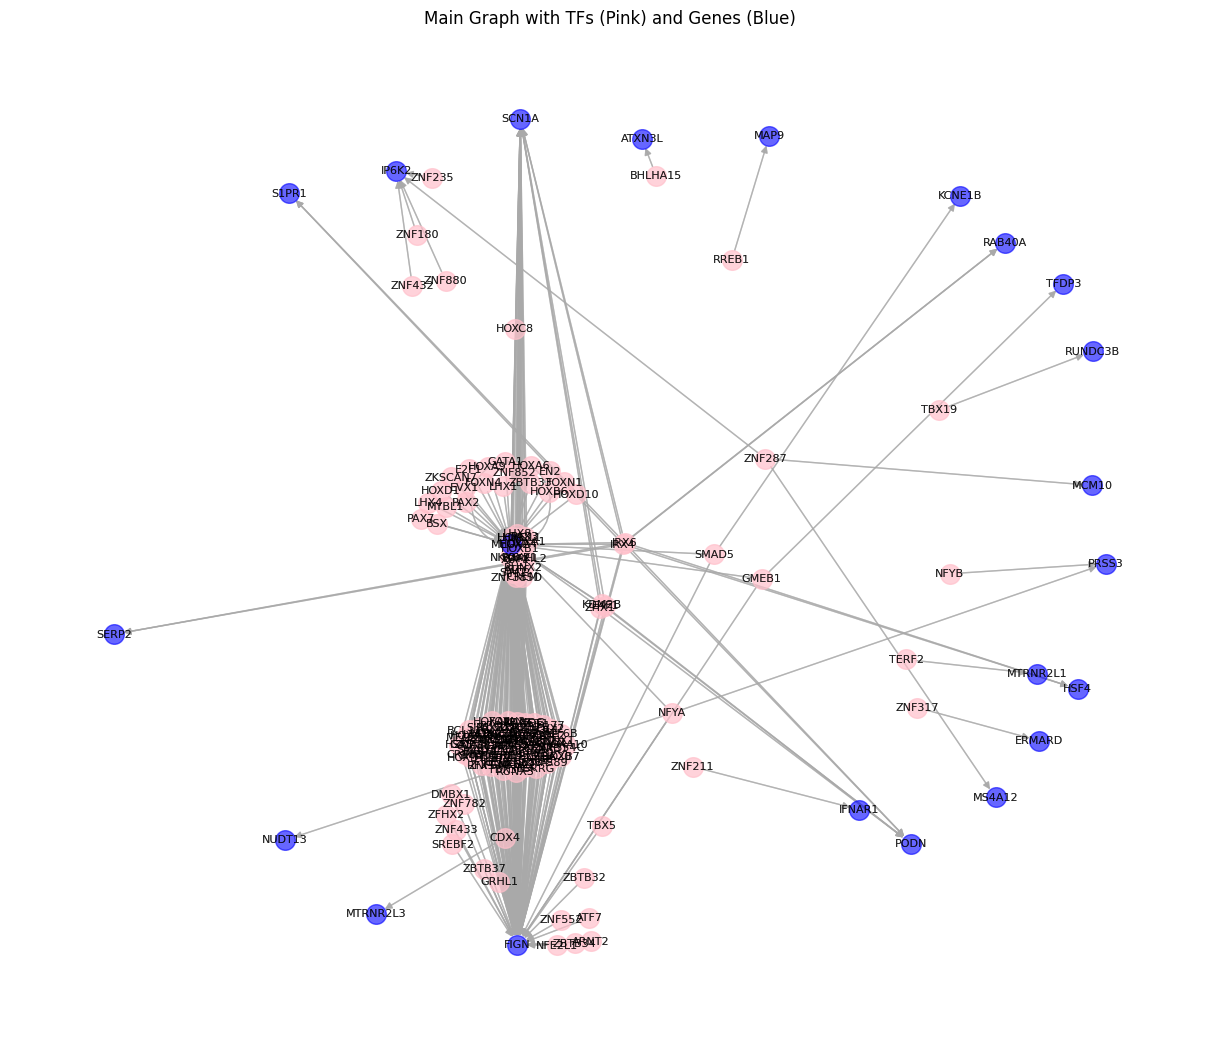

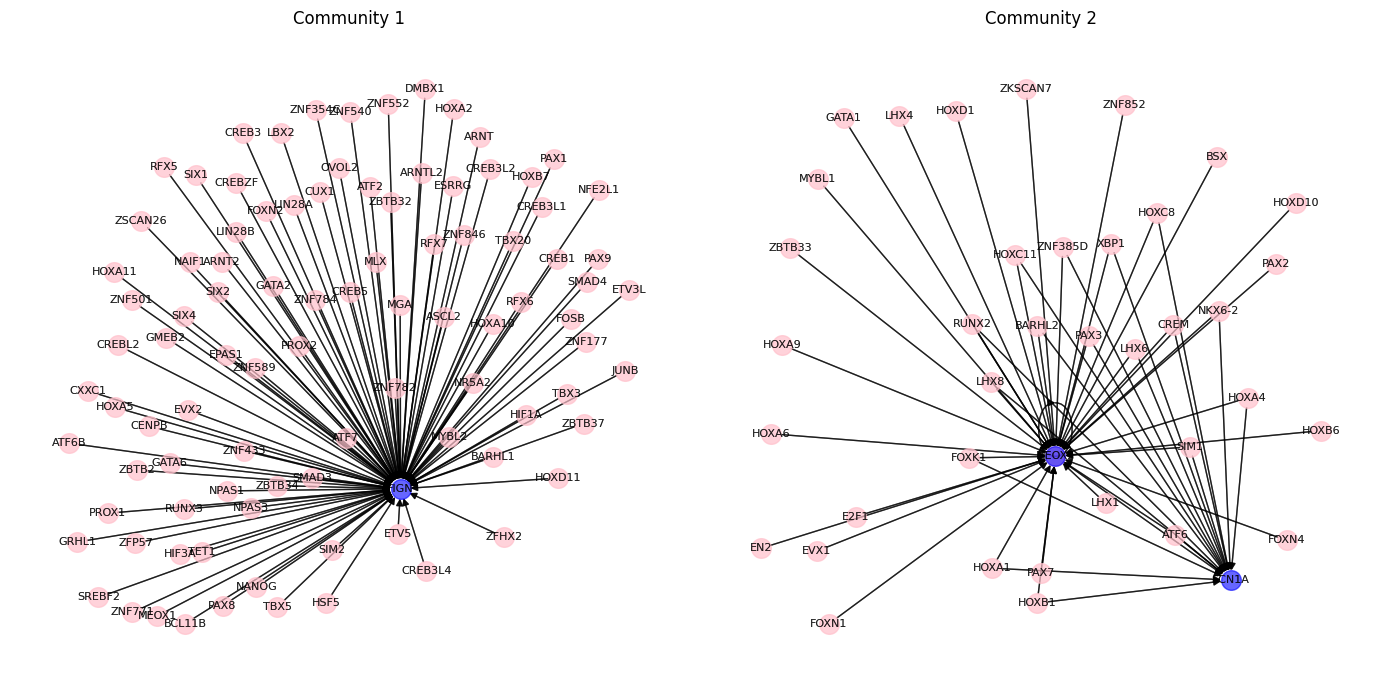

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms import community



# Initialize directed graph for positive interactions
G_positive = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_300_positive_df.iterrows():
    G_positive.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_positive, k=0.8, iterations=100)

# Separate nodes based on Source and Target
source_nodes = set(top_300_positive_df['Source'])
target_nodes = set(top_300_positive_df['Target'])

# Draw the main graph
plt.figure(figsize=(12, 10))
nx.draw(
    G_positive, pos, with_labels=True, node_size=200, nodelist=source_nodes,
    node_color="pink", alpha=0.7, font_size=8, edge_color="darkgrey"
)
nx.draw(
    G_positive, pos, with_labels=True, node_size=200, nodelist=target_nodes,
    node_color="blue", alpha=0.6, font_size=8, edge_color="darkgrey"
)
plt.title("Main Graph with TFs (Pink) and Genes (Blue)")
plt.show()

# Calculate communities
communities = community.greedy_modularity_communities(G_positive)
# Create subplots for communities
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for idx, comm in enumerate(communities[:2]):  # First two communities
    subgraph = G_positive.subgraph(comm)
    sub_pos = nx.spring_layout(subgraph, k=0.8)  # Separate layout for each community

    # Separate nodes into TFs and genes for this subgraph
    sub_source_nodes = [node for node in comm if node in source_nodes]
    sub_target_nodes = [node for node in comm if node in target_nodes]

    # Draw source nodes (TFs) in pink
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=200,
        nodelist=sub_source_nodes, node_color="pink", alpha=0.7, font_size=8
    )

    # Draw target nodes (genes) in blue
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=200,
        nodelist=sub_target_nodes, node_color="blue", alpha=0.6, font_size=8
    )

    axes[idx].set_title(f"Community {idx + 1}")

plt.tight_layout()
plt.show()


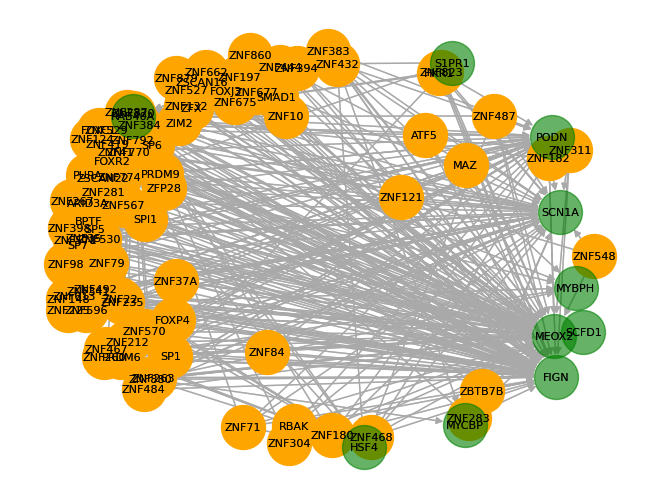

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


# Initialize directed graph for positive interactions
G_negative = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_300_negative_df.iterrows():
    G_negative.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_negative, k=0.6, iterations=30)

# Separate nodes based on Source and Target
source_nodes = set(top_300_negative_df['Source'])
target_nodes = set(top_300_negative_df['Target'])

# Draw the source nodes in pink
nx.draw(G_negative, pos, with_labels=True, node_size=1000, nodelist=source_nodes, node_color="orange", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G_negative, pos, with_labels=True, node_size=1000, nodelist=target_nodes, node_color="green", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
#edge_labels = nx.get_edge_attributes(G_negative, 'weight')
#nx.draw_networkx_edge_labels(G_negative, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()


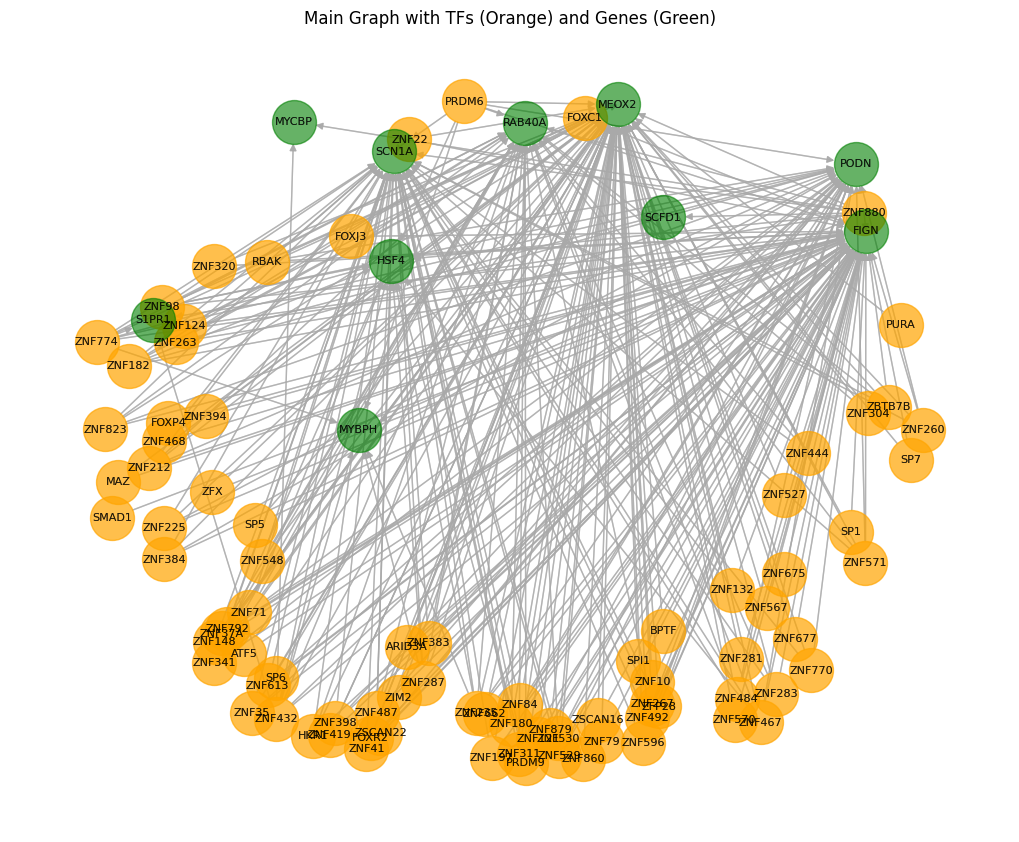

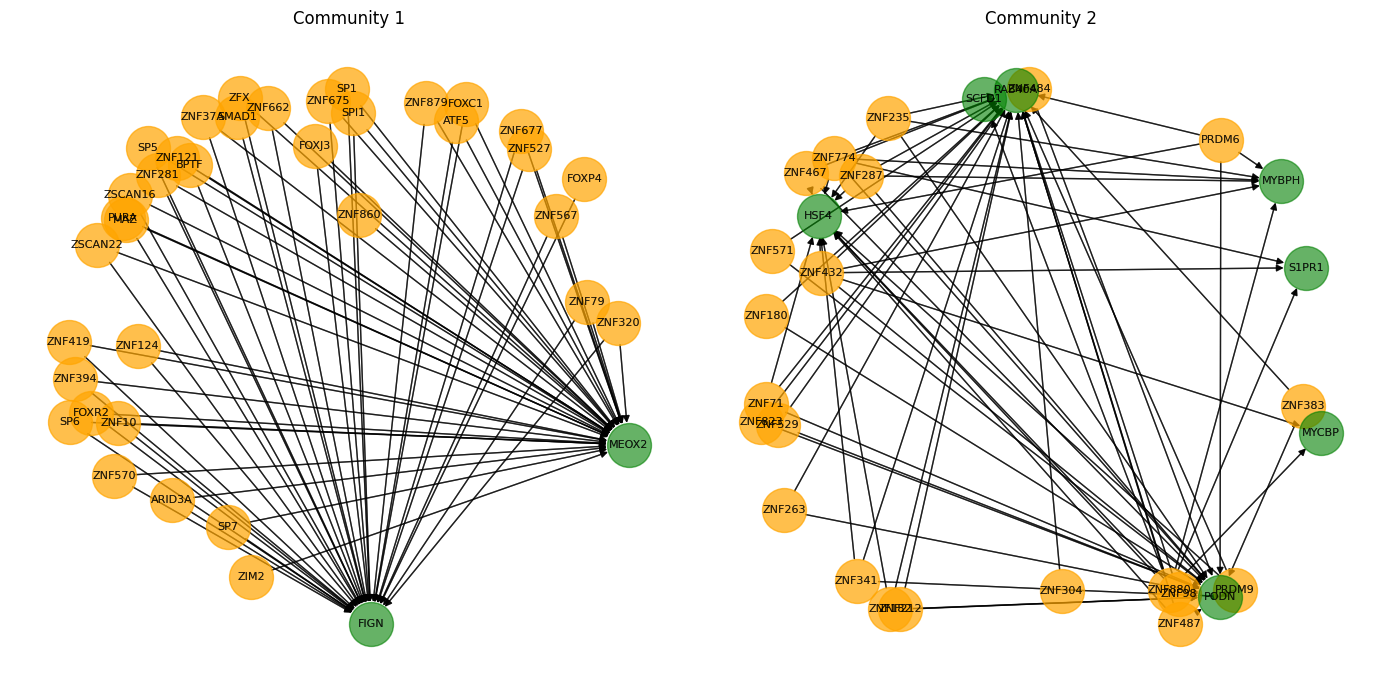

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms import community

# Initialize directed graph for negative interactions
G_negative = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_300_negative_df.iterrows():
    G_negative.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_negative, k=0.6, iterations=30)

# Separate nodes based on Source and Target
source_nodes = set(top_300_negative_df['Source'])
target_nodes = set(top_300_negative_df['Target'])

# Draw the main graph
plt.figure(figsize=(10, 8))
nx.draw(
    G_negative, pos, with_labels=True, node_size=1000, nodelist=source_nodes,
    node_color="orange", alpha=0.7, font_size=8, edge_color="darkgrey"
)
nx.draw(
    G_negative, pos, with_labels=True, node_size=1000, nodelist=target_nodes,
    node_color="green", alpha=0.6, font_size=8, edge_color="darkgrey"
)
plt.title("Main Graph with TFs (Orange) and Genes (Green)")
plt.show()

# Calculate communities for the negative graph
communities_negative = community.greedy_modularity_communities(G_negative)

# Create subplots for communities
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for idx, comm in enumerate(communities_negative[:2]):  # First two communities
    subgraph = G_negative.subgraph(comm)
    sub_pos = nx.spring_layout(subgraph, k=0.8)  # Separate layout for each community

    # Separate nodes into TFs and genes for this subgraph
    sub_source_nodes = [node for node in comm if node in source_nodes]
    sub_target_nodes = [node for node in comm if node in target_nodes]

    # Draw source nodes (TFs) in orange
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=1000,
        nodelist=sub_source_nodes, node_color="orange", alpha=0.7, font_size=8
    )

    # Draw target nodes (genes) in green
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=1000,
        nodelist=sub_target_nodes, node_color="green", alpha=0.6, font_size=8
    )

    axes[idx].set_title(f"Community {idx + 1}")

plt.tight_layout()
plt.show()


I have attempted using Kamada and Planar layouts and it did not yield any explainable or reasonable plots

In [ ]:
#Save the graph in formats like GraphML or GEXF for visualization in tools like Gephi.
nx.write_graphml(G_positive, "positive_interactions.graphml")
nx.write_graphml(G_negative, "negative_interactions.graphml")

# Let's install PyGPS (suggested by Ortega) and use it for signal processing:

In [ ]:
pip install pygsp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.6 MB/s eta 0:00:00


# **1. Convert NetworkX Graph to PyGSP Graph**

In [ ]:
#I decided to use PyGSP package so few adjustments will be required
import networkx as nx
import pygsp as pg
from networkx import to_scipy_sparse_array

# Extract adjacency matrix from NetworkX graph
# Extract adjacency matrix from NetworkX graph as a sparse array
G_positive.remove_edges_from(nx.selfloop_edges(G_positive))##### remove the loop here so now I have 299 edges
adjacency_matrix_pos = to_scipy_sparse_array(G_positive, weight=" Edge weight")

# Create PyGSP graph
gsp_graph_pos= pg.graphs.Graph(adjacency_matrix_pos)

# Display basic graph info
print(f"PyGSP Graph Positive with {gsp_graph_pos.N} nodes and {gsp_graph_pos.Ne} edges.")


PyGSP Graph Positive with 174 nodes and 299 edges.


In [ ]:
# Extract adjacency matrix from NetworkX graph for Negative graph
# Extract adjacency matrix from NetworkX graph as a sparse array
adjacency_matrix_neg = to_scipy_sparse_array(G_negative, weight=" Edge weight")

# Create PyGSP graph
gsp_graph_neg= pg.graphs.Graph(adjacency_matrix_neg)

# Display basic graph info
print(f"PyGSP Graph Negative with {gsp_graph_neg.N} nodes and {gsp_graph_neg.Ne} edges.")


PyGSP Graph Negative with 95 nodes and 300 edges.


since our positive graph has loops, i.e. gene strongly interacting with itself (may be acts as a dimer?), I decided to remove that loop for further analysis.


---




# **2.Compute the Laplacian Matrix**


In [ ]:
# Compute Laplacian (default is combinatorial)
gsp_graph_pos.compute_laplacian(lap_type="combinatorial")
laplacian = gsp_graph_pos.L

print("Laplacian Matrix Pos:")
print(laplacian.toarray())  # Display dense matrix for small graphs


Laplacian Matrix Pos:
[[ 4.  -0.5  0.  ...  0.   0.   0. ]
 [-0.5 63.5 -0.5 ...  0.   0.   0. ]
 [ 0.  -0.5  4.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.5  0.   0. ]
 [ 0.   0.   0.  ...  0.   0.5 -0.5]
 [ 0.   0.   0.  ...  0.  -0.5  0.5]]


In [ ]:
# Compute Laplacian (default is combinatorial)
gsp_graph_neg.compute_laplacian(lap_type="combinatorial")
laplacian = gsp_graph_neg.L

print("Laplacian Matrix Neg:")
print(laplacian.toarray())  # Display dense matrix for small graphs


Laplacian Matrix Neg:
[[ 3.5 -0.5  0.  ...  0.   0.   0. ]
 [-0.5 39.5 -0.5 ... -0.5  0.   0. ]
 [ 0.  -0.5  4.5 ...  0.  -0.5  0. ]
 ...
 [ 0.  -0.5  0.  ...  0.5  0.   0. ]
 [ 0.   0.  -0.5 ...  0.   1.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0.5]]


# 3. Assign Graph Signal
Assign RNa-seq data as the graph signal

In [ ]:
import pandas as pd

# Load RNA-seq data
rna_seq_data = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/MCF_RNAseq_countsGSE208731.csv")  # Replace with your RNA-seq file
# Columns: gene, expression

# Extract genes from graphs
positive_genes = set(G_positive.nodes)
negative_genes = set(G_negative.nodes)
all_genes_in_graph = positive_genes.union(negative_genes)

# Filter RNA-seq data to include only relevant genes
filtered_rna_seq_data = rna_seq_data[rna_seq_data['Gene'].isin(all_genes_in_graph)]

# Verify the alignment
missing_genes = all_genes_in_graph - set(filtered_rna_seq_data['Gene'])
if missing_genes:
    print(f"Warning: The following genes are missing in the RNA-seq data: {missing_genes}")
else:
    print("All graph genes have corresponding RNA-seq data.")



All graph genes have corresponding RNA-seq data.


In [ ]:
#average the expression data based on experimental coditions
import pandas as pd



# Averaging specific column groups and renaming them
column_groups = {
    "MCF7_2D_exp1": [1, 2, 3],      # Columns 1, 2, 3
    "MCF7_3D_exp1": [4, 5, 6],      # Columns 4, 5, 6
    "MCF7_2D_exp2": [7, 8, 9, 10, 11, 12],  # Columns 7 to 12
    "MCF7_3D_exp2": [13, 14, 15, 16, 17, 18]  # Columns 13 to 18
}

# Initialize a new DataFrame with the 'gene' column
averaged_data = filtered_rna_seq_data[['Gene']].copy()

# Compute averages for each group and add to the new DataFrame
for new_column, indices in column_groups.items():
    averaged_data[new_column] = rna_seq_data.iloc[:, indices].mean(axis=1).round(2)

# Save or inspect the resulting DataFrame
print(averaged_data.head())
averaged_data.to_csv("averaged_rna_seq_data.csv", index=False)


        Gene  MCF7_2D_exp1  MCF7_3D_exp1  MCF7_2D_exp2  MCF7_3D_exp2
2625  ARID3A       1159.33        662.67        568.17        355.17
2707    ARNT       5967.00       5173.33       2463.67       2109.67
2708   ARNT2       1991.67       1193.00       1007.00        791.83
2710  ARNTL2       1021.67        460.67        647.50        318.00
2786   ASCL2        825.33        874.33        490.33        680.33


In [ ]:
import networkx as nx
import pandas as pd

#Load RNA-seq data
averaged_rna_seq_data = pd.read_csv("/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/averaged_rna_seq_data.csv")  # Replace with your RNA-seq file



# Ensure the RNA-seq data has a 'Gene' column and averaged columns (e.g., MCF7_2D_exp1, etc.)
# Create a mapping of genes to expression values for each condition

# Extract nodes for G_positive and G_negative
positive_genes = set(G_positive.nodes)
negative_genes = set(G_negative.nodes)

# Filter RNA-seq data for genes in G_positive and G_negative
positive_rna_seq = averaged_rna_seq_data[averaged_rna_seq_data['Gene'].isin(positive_genes)]
negative_rna_seq = averaged_rna_seq_data[averaged_rna_seq_data['Gene'].isin(negative_genes)]

# Create dictionaries for each graph and each condition
expression_dicts_positive = {
    condition: dict(zip(positive_rna_seq['Gene'], positive_rna_seq[condition]))
    for condition in averaged_rna_seq_data.columns[1:]  # Skip 'gene' column
}

expression_dicts_negative = {
    condition: dict(zip(negative_rna_seq['Gene'], negative_rna_seq[condition]))
    for condition in averaged_rna_seq_data.columns[1:]  # Skip 'gene' column
}

# Assign expression values to nodes in G_positive for a specific condition (example: MCF7_2D_exp1)
selected_condition = "MCF7_2D_exp1"  # Replace with the condition you want to use
nx.set_node_attributes(G_positive, expression_dicts_positive[selected_condition], name='expression')
nx.set_node_attributes(G_negative, expression_dicts_negative[selected_condition], name='expression')

# Verify attributes are set correctly
print("G_positive node attributes:")
for node, data in G_positive.nodes(data=True):
    print(node, data)

print("\nG_negative node attributes:")
for node, data in G_negative.nodes(data=True):
    print(node, data)


G_positive node attributes:
IRX6 {'expression': 9.67}
MEOX2 {'expression': 0.33}
IRX4 {'expression': 175.33}
FIGN {'expression': 632.33}
ZHX1 {'expression': 2894.0}
KDM2B {'expression': 2197.33}
E4F1 {'expression': 488.33}
ZNF385D {'expression': 0.33}
SCN1A {'expression': 2.33}
SIM1 {'expression': 194.33}
GMEB1 {'expression': 812.67}
TFDP3 {'expression': 0.33}
NPAS1 {'expression': 14.0}
NPAS3 {'expression': 164.67}
CREM {'expression': 438.0}
SIM2 {'expression': 385.33}
ATF6 {'expression': 2349.67}
NAIF1 {'expression': 390.67}
HIF3A {'expression': 15.33}
EPAS1 {'expression': 1982.0}
SIX2 {'expression': 412.33}
FOXK1 {'expression': 1260.67}
BARHL2 {'expression': 0.0}
GMEB2 {'expression': 1447.0}
PODN {'expression': 1.0}
OVOL2 {'expression': 164.33}
ZNF784 {'expression': 208.33}
ZBTB2 {'expression': 2408.33}
RUNX2 {'expression': 407.67}
XBP1 {'expression': 24545.33}
SIX4 {'expression': 1838.0}
MYBL2 {'expression': 19598.33}
ZNF846 {'expression': 67.33}
NR5A2 {'expression': 132.67}
TERF2 {

In [ ]:
# --- Convert to PyGSP ---
# Convert NetworkX graphs to PyGSP format
adjacency_matrix_positive = to_scipy_sparse_array(G_positive, weight=" Edge weight")
adjacency_matrix_negative = to_scipy_sparse_array(G_negative, weight="Edge weight")

gsp_graph_positive = pg.graphs.Graph(adjacency_matrix_positive)
gsp_graph_negative = pg.graphs.Graph(adjacency_matrix_negative)

# Extract RNA-seq expression as signal vectors for PyGSP
signal_positive = np.array([data['expression'] for _, data in G_positive.nodes(data=True)])
signal_negative = np.array([data['expression'] for _, data in G_negative.nodes(data=True)])

# Ensure signals match graph sizes
assert len(signal_positive) == gsp_graph_positive.N, "Positive graph signal length mismatch!"
assert len(signal_negative) == gsp_graph_negative.N, "Negative graph signal length mismatch!"

# Display signals
print("\nSignal (Positive Graph):", signal_positive[:5])  # Display first 5 for brevity
print("\nSignal (Negative Graph):", signal_negative[:5])  # Display first 5 for brevity


Signal (Positive Graph): [9.6700e+00 3.3000e-01 1.7533e+02 6.3233e+02 2.8940e+03]

Signal (Negative Graph): [2.7333e+02 6.3233e+02 2.4800e+02 3.3000e-01 1.3900e+02]


==========================================================================
Steps to Continue

--Compute Laplacians

Calculate the Laplacian matrices for both graphs using PyGSP.


--Analyze Signal Variation

Measure the variation of RNA-seq signals on the graph using
𝑆(𝑓)=𝑓𝑇𝐿𝑓
S(f)=**fTLf**.

--Optional: Visualize Signal Distribution

Plot the RNA-seq signals or their variations.


## 4 **Compute Laplacians**

In [ ]:
# Compute Laplacians for positive and negative graphs
gsp_graph_positive.compute_laplacian(lap_type="combinatorial")
gsp_graph_negative.compute_laplacian(lap_type="combinatorial")

# Access Laplacian matrices
laplacian_positive = gsp_graph_positive.L
laplacian_negative = gsp_graph_negative.L

print("\nLaplacian Matrix (Positive Graph):")
print(laplacian_positive.toarray()[:5, :5])  # Display first 5x5 for brevity

print("\nLaplacian Matrix (Negative Graph):")
print(laplacian_negative.toarray()[:5, :5])  # Display first 5x5 for brevity



Laplacian Matrix (Positive Graph):
[[ 4.  -0.5  0.  -0.5  0. ]
 [-0.5 63.5 -0.5 -0.5 -0.5]
 [ 0.  -0.5  4.  -0.5  0. ]
 [-0.5 -0.5 -0.5 59.5 -0.5]
 [ 0.  -0.5  0.  -0.5  2. ]]

Laplacian Matrix (Negative Graph):
[[ 3.5 -0.5  0.  -0.5  0. ]
 [-0.5 39.5 -0.5  0.  -0.5]
 [ 0.  -0.5  4.5 -0.5  0. ]
 [-0.5  0.  -0.5 41.5 -0.5]
 [ 0.  -0.5  0.  -0.5  3.5]]


# **5. Analyze Signal Variation**

In [ ]:
# Signal variation for positive and negative graphs
signal_variation_positive = signal_positive.T @ laplacian_positive @ signal_positive
signal_variation_negative = signal_negative.T @ laplacian_negative @ signal_negative

print(f"\nSignal Variation (Positive Graph): {signal_variation_positive}")
print(f"Signal Variation (Negative Graph): {signal_variation_negative}")



Signal Variation (Positive Graph): 2225574813.69935
Signal Variation (Negative Graph): 807433791.72445


# 6.**Optional: Visualize Signal Distribution**

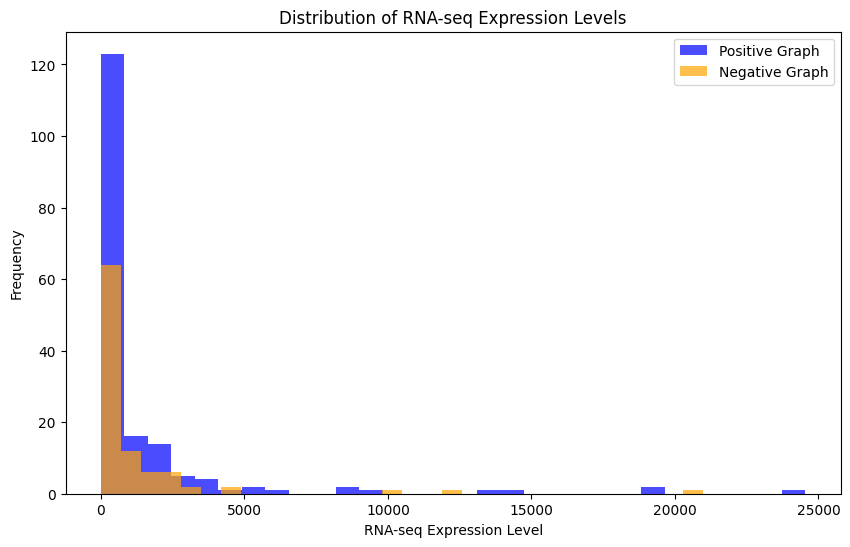

In [ ]:
import matplotlib.pyplot as plt

# Plot RNA-seq signals for positive graph
plt.figure(figsize=(10, 6))
plt.hist(signal_positive, bins=30, alpha=0.7, label="Positive Graph", color='blue')
plt.hist(signal_negative, bins=30, alpha=0.7, label="Negative Graph", color='orange')
plt.xlabel("RNA-seq Expression Level")
plt.ylabel("Frequency")
plt.title("Distribution of RNA-seq Expression Levels")
plt.legend()
plt.show()


# Next Steps
Clustering:
Perform spectral clustering using the eigenvalues and eigenvectors of the Laplacians.

Filtering:
Apply graph filters to smooth or enhance RNA-seq signals on the graphs.

Comparative Analysis:
Compare the results from the positive and negative graphs to identify key genes or regulatory patterns.

# **1. Clustering**
We’ll now perform spectral clustering using the eigenvalues and eigenvectors of the Laplacian matrices for the positive and negative graphs. This helps group nodes (genes) into clusters based on their connectivity patterns and RNA-seq signal variations.

Steps for Spectral Clustering:

A) Compute Eigenvalues and Eigenvectors

Use PyGSP to extract the Fourier basis (eigenvectors of the Laplacian) and corresponding eigenvalues.

B) Cluster Nodes

Use the eigenvectors corresponding to the smallest non-zero eigenvalues for clustering (spectral embedding).

C) Visualize Clustering

Optionally visualize clusters for insights.


In [ ]:
#Compute Eigenvalues and Eigenvectors

# Compute Fourier basis (eigenvalues and eigenvectors) for both graphs
gsp_graph_positive.compute_fourier_basis()
gsp_graph_negative.compute_fourier_basis()

eigvals_positive = gsp_graph_positive.e  # Eigenvalues
eigvecs_positive = gsp_graph_positive.U  # Eigenvectors

eigvals_negative = gsp_graph_negative.e  # Eigenvalues
eigvecs_negative = gsp_graph_negative.U  # Eigenvectors

# Display smallest eigenvalues (skip 0 for connected components)
print("\nEigenvalues (Positive Graph):", eigvals_positive[:10])  # First 10 for brevity
print("\nEigenvalues (Negative Graph):", eigvals_negative[:10])  # First 10 for brevity



Eigenvalues (Positive Graph): [ 0.00000000e+00 -9.25500985e-16 -7.73542735e-16 -9.66928418e-17
 -1.70860733e-25 -9.00674574e-31  0.00000000e+00  2.71270427e-17
  3.86771367e-16  1.27734221e-01]

Eigenvalues (Negative Graph): [0.         0.43009212 0.48230071 0.5        0.5        0.5
 0.5        0.51627036 0.80545375 0.95184983]


In [ ]:
#Perform Spectral Clustering
#Use the eigenvectors associated with the smallest non-zero eigenvalues to cluster the nodes (genes).

from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 3

# Use first few eigenvectors (excluding the first constant eigenvector)
clusters_positive = KMeans(n_clusters=num_clusters).fit_predict(eigvecs_positive[:, 1:num_clusters+1])
clusters_negative = KMeans(n_clusters=num_clusters).fit_predict(eigvecs_negative[:, 1:num_clusters+1])

print("\nClusters (Positive Graph):", clusters_positive[:10])  # First 10 clusters for brevity
print("\nClusters (Negative Graph):", clusters_negative[:10])  # First 10 clusters for brevity)



Clusters (Positive Graph): [0 0 0 0 0 0 0 0 0 0]

Clusters (Negative Graph): [0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Assign Clusters to Nodes
#Assign the cluster labels to nodes in the NetworkX graph for further exploration.

# Assign cluster labels as node attributes
nx.set_node_attributes(G_positive, dict(zip(G_positive.nodes, clusters_positive)), "cluster")
nx.set_node_attributes(G_negative, dict(zip(G_negative.nodes, clusters_negative)), "cluster")

# Verify node clusters
print("\nG_positive Clusters:")
for node, data in list(G_positive.nodes(data=True))[:5]:  # First 5 for brevity
    print(node, data)

print("\nG_negative Clusters:")
for node, data in list(G_negative.nodes(data=True))[:5]:  # First 5 for brevity
    print(node, data)





G_positive Clusters:
IRX6 {'expression': 9.67, 'cluster': 0}
MEOX2 {'expression': 0.33, 'cluster': 0}
IRX4 {'expression': 175.33, 'cluster': 0}
FIGN {'expression': 632.33, 'cluster': 0}
ZHX1 {'expression': 2894.0, 'cluster': 0}

G_negative Clusters:
ZNF287 {'expression': 273.33, 'cluster': 0}
FIGN {'expression': 632.33, 'cluster': 0}
ZNF432 {'expression': 248.0, 'cluster': 0}
MEOX2 {'expression': 0.33, 'cluster': 0}
ZNF235 {'expression': 139.0, 'cluster': 0}


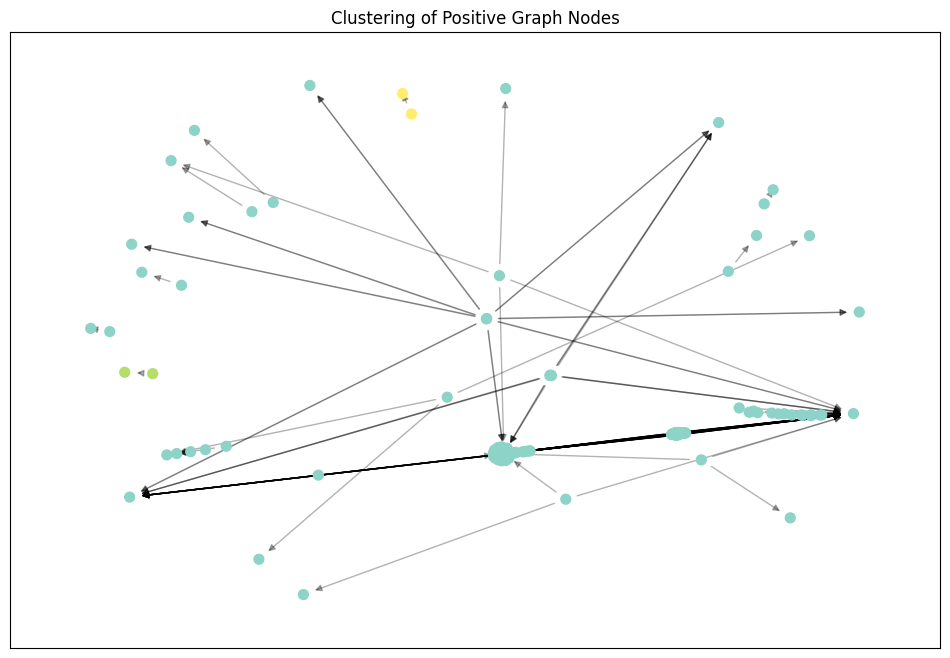

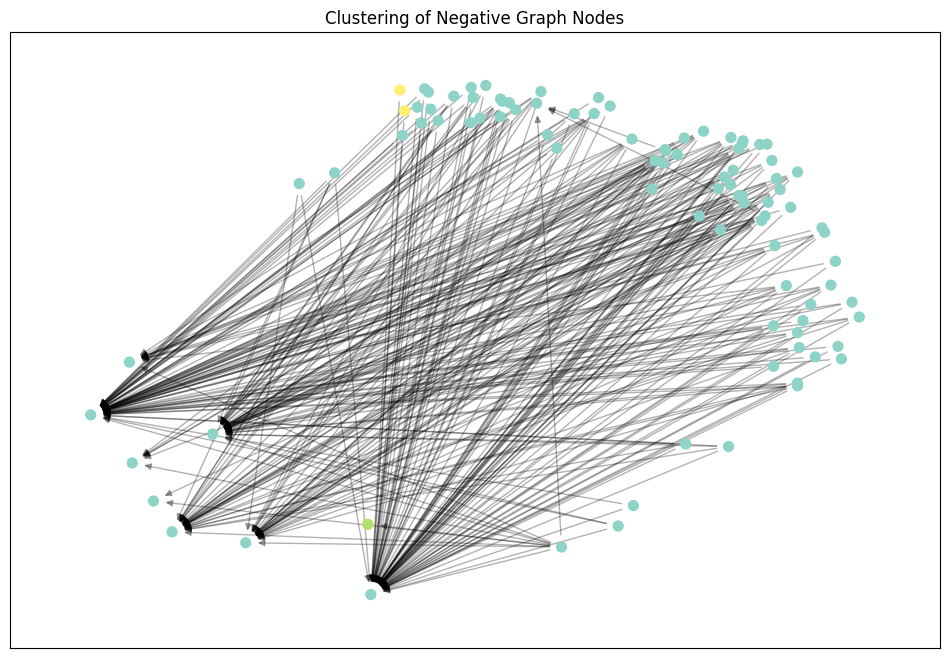

In [ ]:
#Visualize Clustering Results
#(Optional) You can visualize the clustering using a library like Matplotlib.

import matplotlib.pyplot as plt
import networkx as nx

# Visualize positive graph clustering
pos = nx.spring_layout(G_positive)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_positive, pos, node_size=50, node_color=clusters_positive, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_positive, pos, alpha=0.3)
plt.title("Clustering of Positive Graph Nodes")
plt.show()

# Visualize negative graph clustering
pos = nx.spring_layout(G_negative)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_negative, pos, node_size=50, node_color=clusters_negative, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_negative, pos, alpha=0.3)
plt.title("Clustering of Negative Graph Nodes")
plt.show()


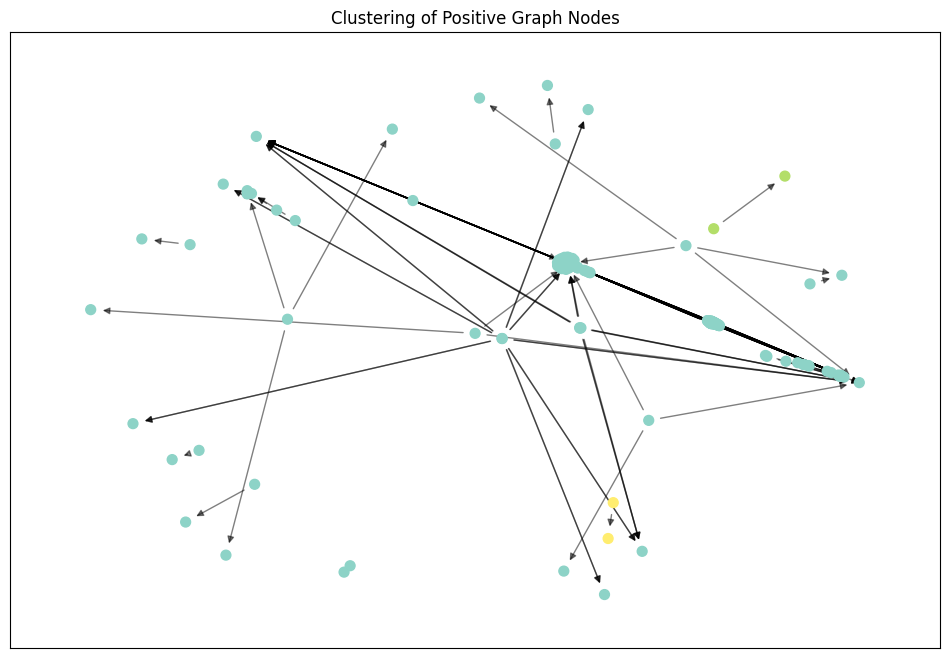

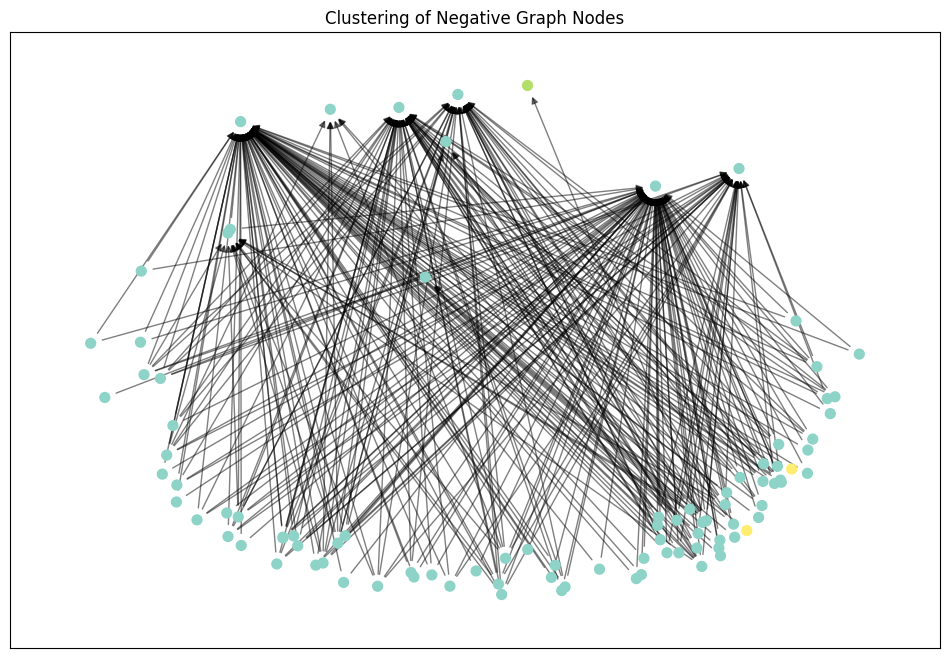

In [ ]:
#Visualize Clustering Results
#(Optional) You can visualize the clustering using a library like Matplotlib.

import matplotlib.pyplot as plt
import networkx as nx

# Visualize positive graph clustering
pos = nx.spring_layout(G_positive)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_positive, pos, node_size=50, node_color=clusters_positive, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_positive, pos, alpha=0.5)
plt.title("Clustering of Positive Graph Nodes")
plt.show()

# Visualize negative graph clustering
pos = nx.spring_layout(G_negative)  # Spring layout for visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_negative, pos, node_size=50, node_color=clusters_negative, cmap=plt.cm.Set3)
nx.draw_networkx_edges(G_negative, pos, alpha=0.5)
plt.title("Clustering of Negative Graph Nodes")
plt.show()


# Lets try to identify the positive graph with stronger interaction hub depicted with thicker edges

# 1. Identify the Hub Node
# The hub node is likely the node with the highest degree or the strongest total edge weight. You can calculate these metrics:

# Degree Centrality (Number of Connections)

In [ ]:
# Get degree centrality for G_positive
degree_centrality = nx.degree_centrality(G_positive)

# Sort nodes by degree centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Display the top nodes
print("Top Nodes by Degree Centrality (Positive Graph):")
for node, centrality in sorted_degree[:5]:  # Top 5 nodes
    print(f"Node: {node}, Degree Centrality: {centrality}")


Top Nodes by Degree Centrality (Positive Graph):
Node: MEOX2, Degree Centrality: 0.7341040462427745
Node: FIGN, Degree Centrality: 0.6878612716763005
Node: SCN1A, Degree Centrality: 0.1329479768786127
Node: IRX6, Degree Centrality: 0.046242774566473986
Node: IRX4, Degree Centrality: 0.046242774566473986


In [ ]:
# Compute strength (sum of edge weights) for each node
strength = {node: sum(data["weight"] for _, _, data in G_positive.edges(node, data=True)) for node in G_positive.nodes()}

# Sort nodes by strength
sorted_strength = sorted(strength.items(), key=lambda x: x[1], reverse=True)

# Display the top nodes
print("\nTop Nodes by Strength (Edge Weights, Positive Graph):")
for node, weight in sorted_strength[:5]:  # Top 5 nodes
    print(f"Node: {node}, Strength (Sum of Weights): {weight}")



Top Nodes by Strength (Edge Weights, Positive Graph):
Node: IRX6, Strength (Sum of Weights): 330.27746628000006
Node: IRX4, Strength (Sum of Weights): 328.70313557
Node: ZHX1, Strength (Sum of Weights): 187.17302318999998
Node: KDM2B, Strength (Sum of Weights): 161.2325386
Node: E4F1, Strength (Sum of Weights): 154.17396538


# **2. Identify Genes and TFs Connected to the Hub**
# Once you identify the hub node, find all nodes connected to it and analyze their edge weights:

In [ ]:
# Get the top hub node (by strength or degree centrality)
top_hub_node = sorted_strength[0][0]  # Replace with your preferred metric

# Get neighbors (connected nodes) of the hub
neighbors = G_positive[top_hub_node]

print(f"\nNeighbors of Hub Node ({top_hub_node}):")
for neighbor, edge_data in neighbors.items():
    print(f"Connected Node: {neighbor}, Edge Weight: {edge_data['weight']}")



Neighbors of Hub Node (IRX6):
Connected Node: MEOX2, Edge Weight: 64.13006049
Connected Node: FIGN, Edge Weight: 60.46431409
Connected Node: SCN1A, Edge Weight: 44.4363919
Connected Node: PODN, Edge Weight: 39.59363071
Connected Node: RAB40A, Edge Weight: 35.70807572
Connected Node: HSF4, Edge Weight: 29.48778339
Connected Node: S1PR1, Edge Weight: 28.66082924
Connected Node: SERP2, Edge Weight: 27.79638074


In [ ]:
top_hub_node = sorted_degree[0][0]  # Use degree centrality to select the hub
# Get neighbors (connected nodes) of the hub
neighbors = G_positive[top_hub_node]

print(f"\nNeighbors of Hub Node ({top_hub_node}):")
for neighbor, edge_data in neighbors.items():
    print(f"Connected Node: {neighbor}, Edge Weight: {edge_data['weight']}")


Neighbors of Hub Node (MEOX2):
Connected Node: FIGN, Edge Weight: 31.6292195
Connected Node: SCN1A, Edge Weight: 27.6255235


# **3. Visualize the Hub and Its Connections**
# You can highlight the hub and its neighbors in a graph visualization:

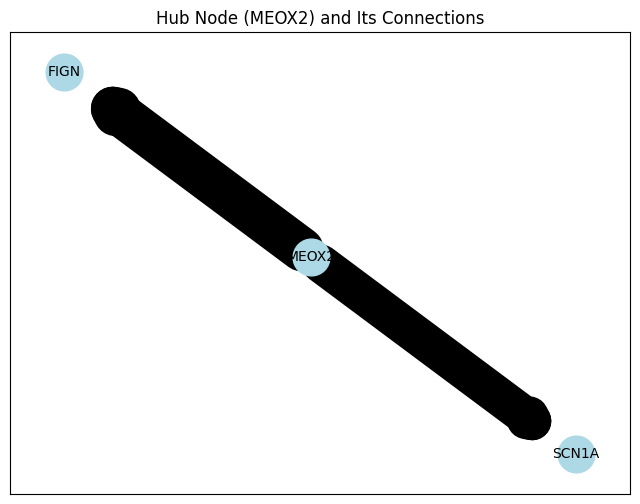

In [ ]:
import matplotlib.pyplot as plt

# Get the subgraph for the hub and its neighbors
hub_subgraph = G_positive.subgraph([top_hub_node] + list(neighbors.keys()))

# Visualize the subgraph
pos = nx.spring_layout(hub_subgraph)  # Layout for visualization
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(hub_subgraph, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(hub_subgraph, pos, width=[d["weight"] for (_, _, d) in hub_subgraph.edges(data=True)])
nx.draw_networkx_labels(hub_subgraph, pos, font_size=10)
plt.title(f"Hub Node ({top_hub_node}) and Its Connections")
plt.show()


# **4. Export Hub Connections for Further Analysis**
# If you want to analyze this data outside Python, export the hub’s connections to a file:

In [ ]:
import pandas as pd

# Create a DataFrame for the hub's connections
hub_connections = pd.DataFrame({
    "TF": [top_hub_node] * len(neighbors),
    "Gene": list(neighbors.keys()),
    "Edge Weight": [data["weight"] for _, data in neighbors.items()]
})

# Save to CSV
hub_connections.to_csv("hub_connections_positive.csv", index=False)
print("\nHub connections exported to 'hub_connections_positive.csv'")



Hub connections exported to 'hub_connections_positive.csv'
